In [6]:
#Import Clean data set
import os
import pandas as pd
import numpy as np

os.chdir(r'C:\Users\nmur1\Google Drive\Springboard\Capstone 1\CleanData')
#Attribute Table 
df_Att = pd.read_csv('IPO Attributes.csv')
df_pricing = pd.read_csv('DailyPricing.csv')

# Write Function to Compare Price Changes for Two given sets of Days

When I get further into analysis I'm going to want to compare the price changes between two given sets of days. The below function will take in 4 days and my pricing table created above. The output will create a dataframe giving me the percentage price change beteen Day1 and Day2 vs. percent change between Day3 and Day4

I.e. the below example I'm inputting 0 to 30 vs. 31 to 90

In [8]:
#Compare price changes based on 2 ranges


def PriceComp(Day1, Day2, Day3, Day4):

    Closing1 = df_pricing.loc[df_pricing['Trade Day']==Day1,['Symbol','C']].set_index('Symbol')
    Closing2 = df_pricing.loc[df_pricing['Trade Day']==Day2,['Symbol','C']].set_index('Symbol')
    Closing3 = df_pricing.loc[df_pricing['Trade Day']==Day3,['Symbol','C']].set_index('Symbol')
    Closing4 = df_pricing.loc[df_pricing['Trade Day']==Day4,['Symbol','C']].set_index('Symbol')

    Change1 = pd.merge(Closing1,Closing2, on = 'Symbol', how ='inner')
    Change1 = Change1.pct_change(axis = 'columns').drop('C_x', axis = 1)
    Change2 = pd.merge(Closing3, Closing4, on = 'Symbol', how = 'inner')
    Change2 = Change2.pct_change(axis = 'columns').drop('C_x', axis = 1)

    Change_Comp = pd.merge(Change1, Change2, on='Symbol', how = 'inner')
    Change_Comp.columns = [str(Day1) + ' to '+ str(Day2), str(Day3) + ' to '+ str(Day4)]
    Change_Comp = Change_Comp.apply(lambda x: x * 100)
    
    
    return Change_Comp

df = PriceComp(0,30,0,260)
print(df['0 to 260'].min())
print(df['0 to 260'].max())
print(df['0 to 260'].mean())
print(df['0 to 260'].std())

-99.99779999989
7519.047619047619
22.563932427874306
193.91681160663242


         bin  value
0      -10.0    1.0
1        0.0  228.0
2        1.0  524.0
3      100.0  366.0
4      250.0  269.0
5      500.0  262.0
6     1000.0  464.0
7     5000.0  110.0
8    10000.0   83.0
9   100000.0    5.0
10  200000.0    NaN


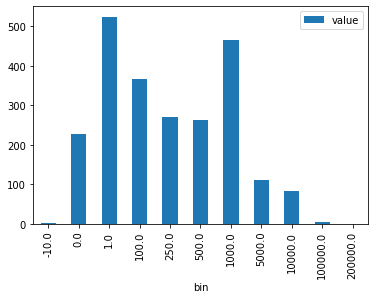

In [9]:
#examine the revenue ranges and create histogram

import numpy as np
rev = df_Att['Revenue_M']

CurrentRev = np.histogram(rev, bins=[-10,0,1,100,250,500,1000,5000,10000,100000,200000])
df_CurRev = pd.DataFrame(CurrentRev, index=['count','bin'])
df_CurRev.columns = df_CurRev.loc['bin']
df_CurRev.drop('bin',inplace = True)

df_CurRev = pd.melt(df_CurRev)
df_CurRev.plot.bar(x = 'bin')
print(df_CurRev)

In [10]:
#assign revenue segments to the attribute table based on the histogram above

def assign_bin(x):
    if x < 0:
        return '01: <0'
    elif x < 1:
        return '02: 0 to 1M'
    elif x<100:
        return  '03: 1M to 100M'
    elif x<250:
        return  '04: 100M to 250M'
    elif x<500:
        return  '05: 250M to 500M'
    elif x<1000:
        return  '06: 500M to 1B'
    elif x<5000:
        return  '07: 1B to 5B'
    elif x<10000:
        return  '08: 5B to 10B'
    elif x<100000:
        return '09: 10B to 100B'
    else:
        return '10: >100B'
    
    

df_Att['Bin'] = df_Att['Revenue_M'].apply(assign_bin)
df_Att.sort_values('Bin')

DaybyRev = df_Att.pivot_table(index = 'Bin', columns = 'DayofWeek', values = 'Symbol', aggfunc = 'count')
df_Att

,Unnamed: 0,Symbol,Safe,Profitable,yearDifferenceGrouped,FoundingDateGrouped,usablePresidentGender,usableCEOGender,FiscalMonth,USACompany,...,CEOTakeOver,PresidentAge,Revenue,presidentInChargeDuringIPO,PresidentTakeOver,Country,Revenue_M,Income_M,DayofWeek,Bin
0,0,A,0,1,Unknown,1951 - 2000,Blank,Blank,Oct,Yes,...,2015.0,56.0,$4.47B,No,2015.0,US,4470.00,684.00,Thur,07: 1B to 5B
1,1,AAC,1,1,Unknown,2011 - present,Blank,male,Dec,Yes,...,2013.0,NaN,$317.64M,No,2018.0,US,317.64,-20.58,Thur,05: 250M to 500M
2,2,AAOI,0,1,Unknown,1951 - 2000,Blank,Blank,Dec,Yes,...,2014.0,54.0,$382.33M,No,2014.0,US,382.33,73.95,Thur,05: 250M to 500M
3,3,AAP,0,1,Unknown,1901 - 1950,Blank,Blank,Dec,Yes,...,2016.0,59.0,$9.37B,No,2016.0,US,9370.00,475.51,Thur,08: 5B to 10B
4,4,AAT,0,0,Unknown,2001 - 2010,Blank,Blank,Dec,Yes,...,2015.0,79.0,$311.68M,No,2015.0,US,311.68,29.08,Thur,05: 250M to 500M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,3754,ZSAN,0,0,Unknown,2011 - present,Blank,Blank,Dec,Yes,...,2017.0,68.0,NaN,No,2017.0,US,0.00,-29.11,Tue,02: 0 to 1M
2308,3756,ZTS,0,1,Unknown,2011 - present,Blank,male,Dec,Yes,...,2012.0,46.0,$5.31B,No,2016.0,US,5310.00,864.00,Fri,08: 5B to 10B
2309,3757,ZUMZ,1,1,Unknown,1951 - 2000,Blank,Blank,Jan,Yes,...,2011.0,54.0,$927.40M,No,2017.0,US,927.40,26.80,Fri,06: 500M to 1B
2310,3758,ZUO,0,0,Unknown,2001 - 2010,Unknown,mostly_male,Jan,Yes,...,2017.0,NaN,$167.93M,NaN,NaN,US,167.93,-47.16,Thur,04: 100M to 250M


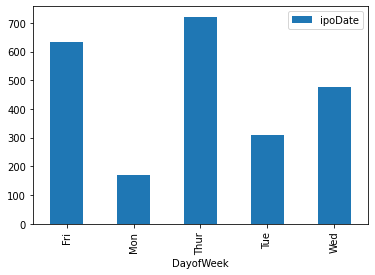

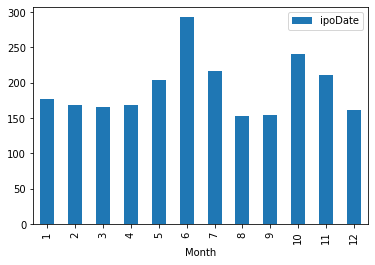

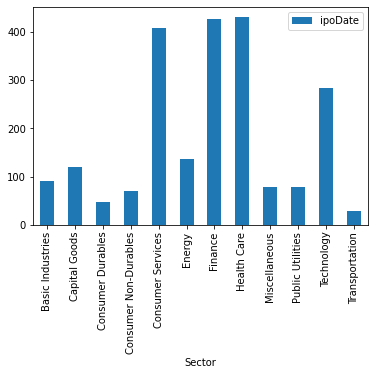

<Figure size 432x288 with 0 Axes>

In [11]:
#EXAMINE STATS
import matplotlib.pyplot as plt

DOW_freq = df_Att.pivot_table(index = 'DayofWeek', values = 'ipoDate', aggfunc = "count")
DOW_freq.plot(kind = 'bar')
plt.show()

Month_freq = df_Att.pivot_table(index = 'Month', values = 'ipoDate', aggfunc = "count")
Month_freq.plot(kind = 'bar')
plt.show()

Sector_freq = df_Att.pivot_table(index = 'Sector', values = 'ipoDate', aggfunc = "count")
Sector_freq.plot(kind = 'bar')
plt.show()


plt.clf()




In [12]:
#Thursday is the most popular IPO day across most revenue segments
DaybyRev.idxmax(axis = 1)

Bin
01: <0              Thur
02: 0 to 1M         Thur
03: 1M to 100M       Fri
04: 100M to 250M    Thur
05: 250M to 500M     Fri
06: 500M to 1B       Fri
07: 1B to 5B        Thur
08: 5B to 10B       Thur
09: 10B to 100B     Thur
10: >100B           Thur
dtype: object

In [13]:
dfMonth = df_Att.pivot_table(index = 'Bin', columns = 'Month', values = 'Symbol', aggfunc = 'count').fillna(0)


dfMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Bin,,,,,,,,,,,,
01: <0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02: 0 to 1M,23.0,18.0,22.0,16.0,22.0,22.0,20.0,17.0,13.0,23.0,17.0,15.0
03: 1M to 100M,44.0,37.0,42.0,39.0,46.0,51.0,47.0,36.0,39.0,63.0,45.0,35.0
04: 100M to 250M,20.0,30.0,22.0,24.0,17.0,106.0,33.0,18.0,20.0,32.0,28.0,16.0
05: 250M to 500M,22.0,23.0,21.0,27.0,35.0,21.0,20.0,12.0,20.0,25.0,24.0,19.0
06: 500M to 1B,21.0,14.0,15.0,25.0,25.0,19.0,30.0,25.0,11.0,30.0,30.0,17.0
07: 1B to 5B,31.0,33.0,35.0,26.0,40.0,46.0,48.0,35.0,39.0,46.0,50.0,35.0
08: 5B to 10B,14.0,9.0,4.0,5.0,7.0,19.0,7.0,5.0,9.0,11.0,9.0,11.0
09: 10B to 100B,2.0,3.0,4.0,6.0,10.0,9.0,11.0,4.0,3.0,11.0,7.0,13.0


In [14]:
dfMonth.idxmax(axis = 1)

Bin
01: <0               5
02: 0 to 1M          1
03: 1M to 100M      10
04: 100M to 250M     6
05: 250M to 500M     5
06: 500M to 1B       7
07: 1B to 5B        11
08: 5B to 10B        6
09: 10B to 100B     12
10: >100B            2
dtype: int64

In [15]:
dfSector = df_Att.pivot_table(index = 'Bin', columns = 'Sector', aggfunc = 'count', values = 'Symbol')
dfSector.idxmin(axis = 1)

Bin
01: <0                  Consumer Services
02: 0 to 1M         Consumer Non-Durables
03: 1M to 100M             Transportation
04: 100M to 250M    Consumer Non-Durables
05: 250M to 500M        Consumer Durables
06: 500M to 1B             Transportation
07: 1B to 5B               Transportation
08: 5B to 10B              Transportation
09: 10B to 100B          Basic Industries
10: >100B                   Capital Goods
dtype: object

In [16]:
#Consumer services dominate IPO's in teh $250M to $100B Revenue range
dfSector = df_Att.pivot_table(index = 'Bin', columns = 'Sector', aggfunc = 'count', values = 'Symbol')
dfSector.idxmax(axis = 1)

Bin
01: <0              Consumer Services
02: 0 to 1M               Health Care
03: 1M to 100M            Health Care
04: 100M to 250M              Finance
05: 250M to 500M    Consumer Services
06: 500M to 1B      Consumer Services
07: 1B to 5B        Consumer Services
08: 5B to 10B       Consumer Services
09: 10B to 100B     Consumer Services
10: >100B                  Technology
dtype: object

In [17]:
dfState = df_Att.pivot_table(index = 'Sector', aggfunc = 'count', values = 'Symbol')
dfState.idxmax(axis = 0)

Symbol    Health Care
dtype: object

Industry
Major Pharmaceuticals                                            244
Major Banks                                                      156
Real Estate Investment Trusts                                    129
Business Services                                                108
Computer Software: Prepackaged Software                           79
Oil & Gas Production                                              65
EDP Services                                                      63
Industrial Machinery/Components                                   52
Savings Institutions                                              51
Biotechnology: Biological Products (No Diagnostic Substances)     49
Name: Symbol, dtype: int64


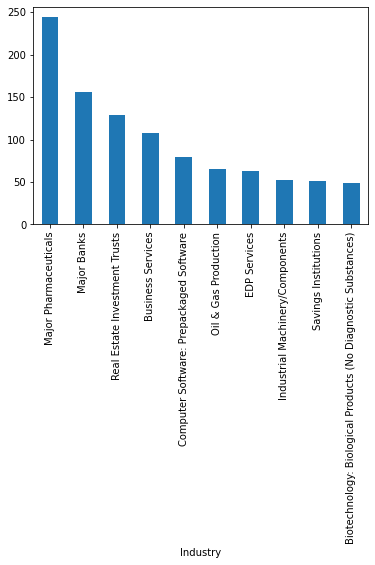

In [18]:
#Top 10 industries by IPO
TotalIPOs = df_Att.groupby('Industry')['Symbol'].count().sort_values(ascending = False).head(10)
TotalIPOs.plot(kind = 'bar')
print(TotalIPOs)

Industry
Integrated oil Companies                            36020.687500
Auto Manufacturing                                  32586.170000
Catalog/Specialty Distribution                      25426.373750
Life Insurance                                      19655.516250
Air Freight/Delivery Services                       15201.666667
Trucking Freight/Courier Services                   14586.434000
Computer Software: Programming, Data Processing     14526.085263
Medical Specialities                                13888.604000
Electronics Distribution                             9220.000000
Retail: Computer Software & Peripheral Equipment     9185.000000
Name: Revenue_M, dtype: float64


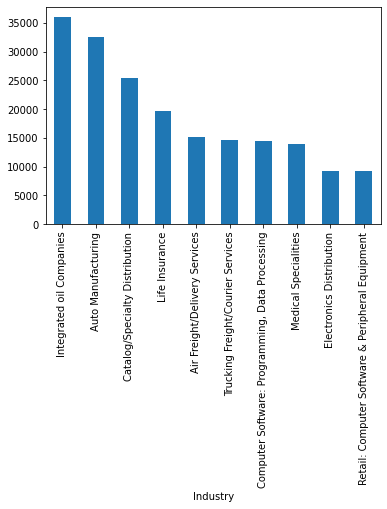

In [19]:
#Top 10 industries by avearge annual revenue
AverageRev = df_Att.groupby('Industry')['Revenue_M'].mean().sort_values(ascending = False).head(10)
AverageRev.plot(kind = 'bar')
print(AverageRev)

DayofWeek
Thur    2716.232368
Mon     2353.059083
Wed     2130.073969
Tue     1790.719149
Fri     1515.268951
Name: Revenue_M, dtype: float64


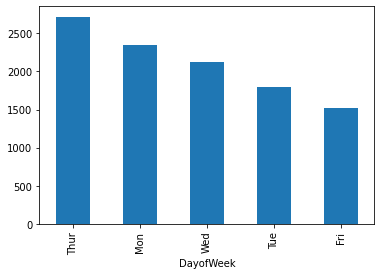

In [20]:
AverageRev = df_Att.groupby('DayofWeek')['Revenue_M'].mean().sort_values(ascending = False).head(10)
AverageRev.plot(kind = 'bar')
print(AverageRev)

                       Revenue_MAvg  Revenue_MCnt
Sector                                           
Transportation          6737.556207            29
Public Utilities        5216.714218            78
Consumer Non-Durables   4625.184159            69
Energy                  3747.683942           137
Consumer Durables       3456.828745            47
Capital Goods           3100.553672           119
Miscellaneous           2285.302025            79
Consumer Services       2240.299000           410
Basic Industries        2160.261667            90
Technology              2007.158215           284


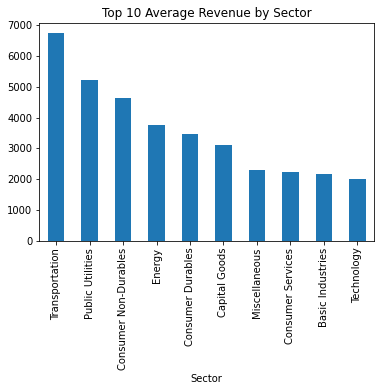

In [21]:
def stats(group, Col, Focus):
    
    Avg = df_Att.groupby(group)[Col].mean()
    Cnt =  df_Att.groupby(group)[Col].count()
    
    
    table =pd.merge(Avg,Cnt, on = group, how = 'inner', suffixes = ['Avg','Cnt'])
   
    Avg_Lab = Col+ 'Avg'
    Count_Lab = Col + 'Cnt'
    
    if Focus == 'Avg':
         table = table.sort_values(by = Avg_Lab, ascending = False ).head(10)
    else:
        table = table.sort_values(by = Count_Lab, ascending = False).head(10)
        
    print(table)
    
    if Focus == 'Avg':
        Avg.sort_values(ascending = False).head(10).plot(kind = 'bar', title = "Top 10 Average Revenue by " + group)
    else:
        Cnt.sort_values(ascending = False).head(10).plot(kind = 'bar', title = "Top 10 Total IPO's by " + group )
        
        
    
graph = stats('Sector', 'Revenue_M', 'Avg')

      Revenue_MAvg  Revenue_MCnt
Year                            
2001   8131.466383            47
1997   4870.870769            91
2012   2895.196838            99
2004   2766.952048            84
2003   2573.613810            42
1998   2556.423739            88
2002   2454.279659            41
2010   2420.427059           102
1999   2372.899348            92
2005   2211.258467            92


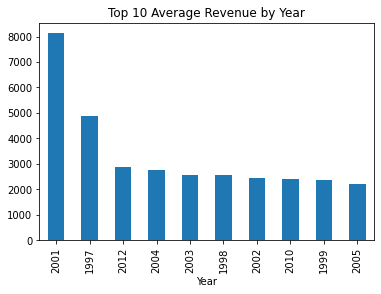

In [22]:
graph = stats('Year', 'Revenue_M', 'Avg')

In [23]:
dfAttPrice = pd.merge(df_Att, PriceComp(0,30,31,60), on = 'Symbol', how = 'left')
col = dfAttPrice.columns[-2]
dfAttPrice.groupby('Sector')[col].mean()

Sector
Basic Industries          7.664243
Capital Goods            11.654033
Consumer Durables         0.532599
Consumer Non-Durables     5.326274
Consumer Services         2.194846
Energy                   15.663399
Finance                   2.536369
Health Care               8.718856
Miscellaneous             8.094693
Public Utilities          1.111774
Technology               12.611288
Transportation            9.268887
Name: 0 to 30, dtype: float64

                         0 to 30   0 to 260
Sector                                     
Basic Industries        7.314679  28.615943
Capital Goods          11.422626  22.736707
Consumer Durables      -0.215098  47.052166
Consumer Non-Durables   5.746821  15.890456
Consumer Services       2.391992  10.123013
Energy                 16.296659  97.767265
Finance                 2.363786  20.264542
Health Care             8.814491  20.678001
Miscellaneous          12.517044  40.285871
Public Utilities        1.253347   5.160024
Technology             10.561591  22.351852
Transportation          9.945093  36.384479
                          0 to 30    0 to 260
Sector                                       
Basic Industries        28.516769   91.509851
Capital Goods           37.134662   79.473971
Consumer Durables       20.716550  278.045437
Consumer Non-Durables   32.155371   69.049612
Consumer Services       19.218253   53.303974
Energy                 143.100525  724.189844
Finance         

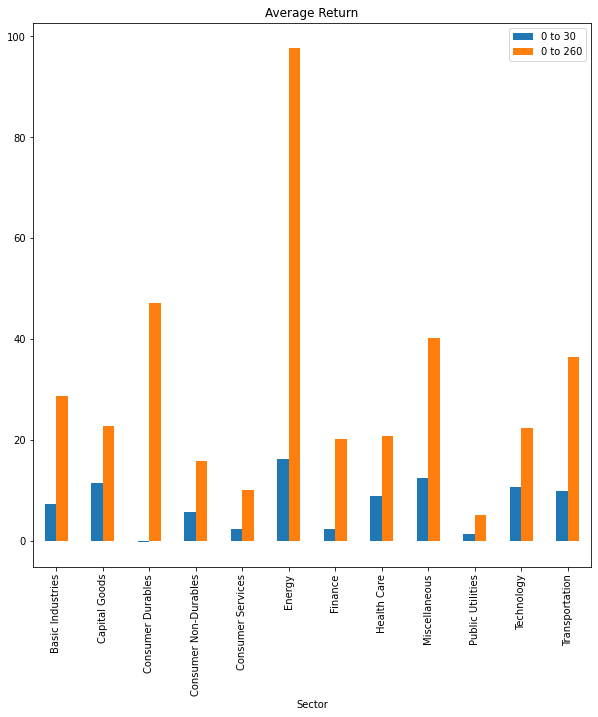

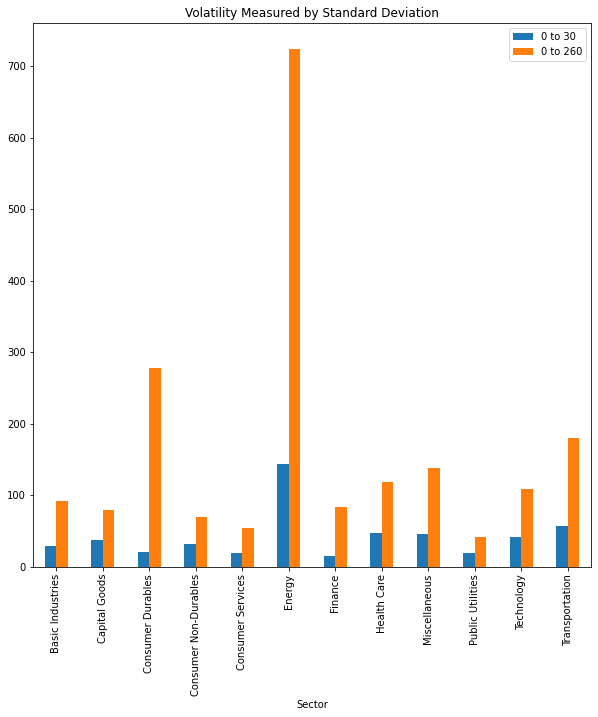

In [24]:
dfAttPrice = pd.merge(df_Att, PriceComp(0,30,0,260), on = 'Symbol', how = 'left')

def stats(group, r):
    
    col1 = dfAttPrice.columns[-2]
    col2 = dfAttPrice.columns[-1]
    
    Range1 = dfAttPrice.groupby(group)[col1].mean()
    Range2 =  dfAttPrice.groupby(group)[col2].mean()
    Range1_max = dfAttPrice.groupby(group)[col1].mean()
    Range2_max = dfAttPrice.groupby(group)[col2].max()
    Range1_min = dfAttPrice.groupby(group)[col1].min()
    Range2_min = dfAttPrice.groupby(group)[col2].min()
    Range1_std = dfAttPrice.groupby(group)[col1].std()
    Range2_std = dfAttPrice.groupby(group)[col2].std()
    
    Avg = pd.merge(Range1,Range2, on = group, how = 'left', suffixes = ['1','2'])
    Max = pd.merge(Range1_max,Range2_max, on = group, how = 'left', suffixes = ['1','2'])
    Min = pd.merge(Range1_min,Range2_min, on = group, how = 'left', suffixes = ['1','2'])
    std = pd.merge(Range1_std,Range2_std, on = group, how = 'left', suffixes = ['1','2'])
    All = pd.concat([Avg,Max,Min, std], axis = 1)
    All.columns = ['Range1Avg', 'Range2Avg', 'Range1Max', 'Range2Max', 'Range1Min', 'Range2Min', 'Range1Std','Range2Std']
   
    
    if r == 'Avg':
        return Avg
    elif r == 'Max':
        return Max
    elif r == 'Min': 
        return Min
    elif r == 'Std': 
        return std
    elif r == 'All': 
        return All

df_avg = stats('Sector','Avg')
df_std = stats('Sector', 'Std')

df_avg.plot(kind = 'bar', figsize = (10,10), title = 'Average Return')
print(df_avg)
df_std.plot(kind = 'bar', figsize = (10,10), title = 'Volatility Measured by Standard Deviation')
print(df_std)

In [25]:
dfAttPrice = pd.merge(df_Att, PriceComp(0,30,31,60), on = 'Symbol', how = 'left')
dfAttPrice.shape

(2312, 58)

In [26]:
stats('Sector','All')

,Range1Avg,Range2Avg,Range1Max,Range2Max,Range1Min,Range2Min,Range1Std,Range2Std
Sector,,,,,,,,
Basic Industries,7.664243,2.804514,7.664243,180.875618,-53.333333,-83.333333,28.312180,27.625151
Capital Goods,11.654033,3.643942,11.654033,191.120815,-38.081075,-58.166476,36.569559,28.809080
Consumer Durables,0.532599,70.405844,0.532599,2966.666667,-50.555556,-27.376216,20.538376,447.171308
Consumer Non-Durables,5.326274,2.023652,5.326274,114.912281,-51.428571,-60.000000,31.897331,20.238998
Consumer Services,2.194846,1.243027,2.194846,120.000000,-61.904762,-47.248034,19.480383,15.065369
Energy,15.663399,4.162708,15.663399,243.992248,-37.542662,-35.132743,139.223551,25.110137
Finance,2.536369,1.471996,2.536369,76.200152,-43.809524,-61.376404,13.475613,11.212568
Health Care,8.718856,4.757050,8.718856,372.222222,-68.292683,-72.696970,46.035621,38.616899
Miscellaneous,8.094693,6.901275,8.094693,183.707827,-45.625000,-52.234475,30.491850,27.475769


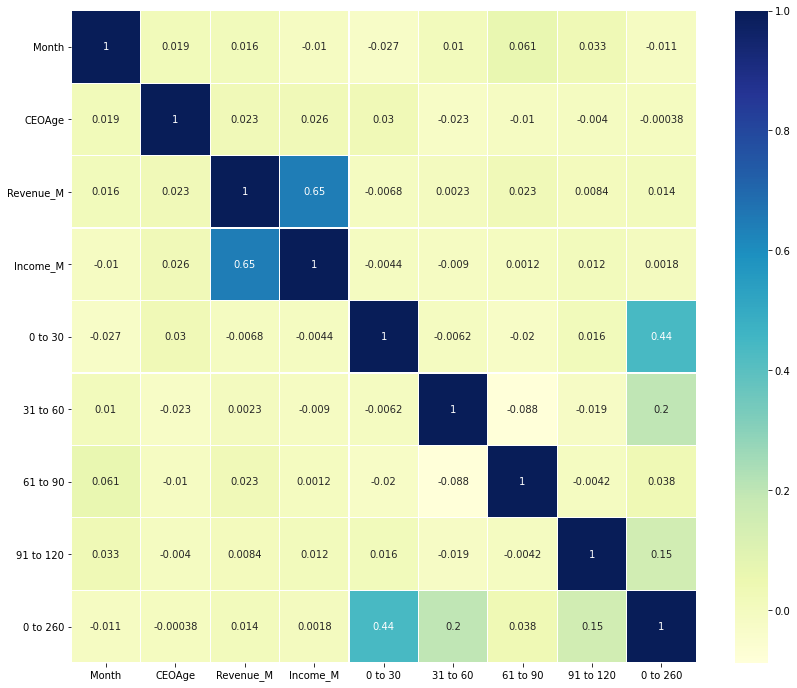

In [27]:
import seaborn as sns
df_corr = df_Att.loc[:,['Symbol','Month', 'CEOAge','Revenue_M', 'Income_M']]
df_corr = pd.merge(df_corr, PriceComp(0,30,31,60), on = 'Symbol', how = 'left')
df_corr = pd.merge(df_corr, PriceComp(61,90,91,120), on = 'Symbol', how = 'left')
df_corr = pd.merge(df_corr, PriceComp(0,260,0,0), on = 'Symbol', how = 'left')
df_corr.drop(df_corr.columns[-1], axis = 1, inplace = True)
#df_corr = df_corr.rename(columns = {'Range1_x':'Q1','Range2_x':'Q2','Range1_y':'Q3','Range2_y':'Q4','Range1':'FY'})

plt.figure(figsize=(14,12))
sns.heatmap(df_corr.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);


In [28]:
df_Annual = pd.merge(df_Att, PriceComp(0,260,0,0), on = 'Symbol', how = 'left')
df_Annual.drop(df_Annual.columns[-1], axis = 1,inplace = True)

df_Annual = df_Annual.loc[:,['Year','Sector','0 to 260']]
df_Annual = df_Annual.pivot_table(index = 'Sector', columns = 'Year', values = '0 to 260', aggfunc = 'mean')

df_Annual


Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Sector,,,,,,,,,,,,,,,,,,,,,
Basic Industries,58.554848,24.782403,-45.001387,101.549145,55.975936,NaN,-7.218935,203.233902,44.920332,-3.900217,...,-2.636087,31.392675,20.445184,30.963084,-2.241628,97.602953,-13.010419,-4.345241,28.358898,56.814701
Capital Goods,32.949763,8.680939,61.743355,64.025476,16.896946,25.794227,NaN,NaN,12.602116,49.431297,...,-77.125984,32.102540,-0.822505,-2.017750,62.531252,79.738230,-2.091893,-25.102728,55.208285,10.544501
Consumer Durables,37.270304,11.936148,-47.460733,-61.992994,18.233333,12.904132,-39.827798,29.161290,3.625731,-17.624601,...,-34.376130,8.229426,108.550753,883.333333,8.321446,13.196248,14.941972,10.997205,79.555556,NaN
Consumer Non-Durables,-15.602675,-4.984251,-38.030769,-15.917797,0.870293,44.761331,2.028986,18.052738,41.031111,33.659945,...,-27.741492,26.768802,107.096690,50.977825,34.425513,0.224771,-55.791847,-5.432550,32.941320,-37.786561
Consumer Services,33.786002,25.045754,-2.739250,-26.698622,-57.066814,46.740994,25.739204,29.099645,24.460261,33.634866,...,39.062133,14.137173,7.044097,-7.877416,27.272070,8.700132,6.276102,1.216965,14.171485,-14.010941
Energy,64.325088,-30.909420,0.000000,6.278948,-55.075153,8.926055,38.278861,45.150776,44.751267,35.063140,...,NaN,-8.457078,968.978314,13.142049,252.032574,34.533687,-27.801203,-11.023992,15.090359,-17.219698
Finance,49.210491,33.788586,55.077883,6.765850,16.875401,18.082487,36.505522,24.188053,16.151709,26.561677,...,3.814325,30.440705,1.296191,11.632840,47.516520,31.401048,6.881157,4.718643,20.123064,10.142291
Health Care,18.212142,25.112420,58.145731,185.773091,-19.749202,-11.256410,103.000000,27.404838,35.693273,0.711367,...,87.528987,-51.960046,127.941634,-3.416846,54.617729,23.935976,30.212413,-28.954218,26.342476,168.137768
Miscellaneous,-3.575869,43.187816,386.547522,-56.148127,69.937500,87.285189,NaN,NaN,-8.158576,70.226410,...,-35.096713,-88.125000,29.845788,7.458409,58.044391,28.904894,51.699763,-1.097504,4.289172,NaN
